In [5]:
# download wordnet and wordnet_ic
# - pygraphviz

import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
# download_dir

[nltk_data] Downloading package omw-1.4 to /home/ki/nltk_data...
[nltk_data] Downloading package wordnet to /home/ki/nltk_data...


In [6]:
categories = set()
# categories.add('airplane')
# categories.add('automobile')
# categories.add('bird')
# categories.add('cat')
# categories.add('deer')
# categories.add('dog')
# categories.add('frog')
# categories.add('horse')
# categories.add('ship')
# categories.add('truck')

categories.add('Hylobates_lar')
categories.add('Orangutan')
categories.add('Chimpanzee')

# categories.add('Gibbon')
categories.add('Siamang')
categories.add('Madagascar_cat')
categories.add('marmoset') # Woolly_indris')
categories.add('Guenon')
categories.add('Baboon')
categories.add('Macaque')
categories.add('Langur')

categories.add('Colobus')
categories.add('Marmoset') # s
categories.add('Cebus_capucinus')
categories.add('howler_monkey')
categories.add('titi_monkey')
categories.add('spider_monkey')
categories.add('Squirrel_monkey')
# categories.add('automobile')
# categories.add('bird')
# categories.add('cat')
# categories.add('deer')
# categories.add('dog')
# categories.add('frog')
# categories.add('horse')
# categories.add('ship')
# categories.add('truck')

In [7]:
super_cats = [
    "great_ape", "lesser_ape", "ape", "lemur", "old_world_monkey", "new_world_monkey", "monkey" 
]

def get_hypers(word, s=set()):
    if word.hypernyms():
        s.add(word.hypernyms()[0])
        get_hypers(word.hypernyms()[0], s)
        
    return s 
    
for c in categories:
    w = wn.synset(f"{c}.n.01")
    h = get_hypers(w, s=set())
    print(f"'n{w.offset():08d}': ('{w.name().split('.')[0]}'", end="")
    
    # print(get_hypers(w))
    
    for sc in super_cats:
        ws = wn.synset(f"{sc}.n.01")
        if ws in h:
            # print(f"{w} is a {ws} ({h})")
            print(", 1", end="")
        else:
            print(", 0", end="")
    
    print("),")
            
    # w.
    # great_ape, Lesser ape, Ape, Lemur, Old-world monkey, New-world monkey, Monkey 
    

'n02493793': ('spider_monkey', 0, 0, 0, 0, 0, 1, 1),
'n02497673': ('madagascar_cat', 0, 0, 0, 1, 0, 0, 0),
'n02480495': ('orangutan', 1, 0, 1, 0, 0, 0, 0),
'n02490219': ('marmoset', 0, 0, 0, 0, 0, 1, 1),
'n02483708': ('siamang', 0, 1, 1, 0, 0, 0, 0),
'n02492035': ('capuchin', 0, 0, 0, 0, 0, 1, 1),
'n02481823': ('chimpanzee', 1, 0, 1, 0, 0, 0, 0),
'n02488702': ('colobus', 0, 0, 0, 0, 1, 0, 1),
'n02492660': ('howler_monkey', 0, 0, 0, 0, 0, 1, 1),
'n02484975': ('guenon', 0, 0, 0, 0, 1, 0, 1),
'n02486410': ('baboon', 0, 0, 0, 0, 1, 0, 1),
'n02490219': ('marmoset', 0, 0, 0, 0, 0, 1, 1),
'n02487347': ('macaque', 0, 0, 0, 0, 1, 0, 1),
'n02494079': ('squirrel_monkey', 0, 0, 0, 0, 0, 1, 1),
'n02493509': ('titi', 0, 0, 0, 0, 0, 1, 1),
'n02488291': ('langur', 0, 0, 0, 0, 1, 0, 1),
'n02483362': ('gibbon', 0, 1, 1, 0, 0, 0, 0),


In [8]:
# _all_hypernyms
# print(wn.synset("lesser_ape.n.01") in w._all_hypernyms)

In [9]:
dir(w)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_all_hypernyms',
 '_definition',
 '_doc',
 '_examples',
 '_frame_ids',
 '_hypernyms',
 '_instance_hypernyms',
 '_iter_hypernym_lists',
 '_lemma_names',
 '_lemma_pointers',
 '_lemmas',
 '_lexname',
 '_max_depth',
 '_min_depth',
 '_name',
 '_needs_root',
 '_offset',
 '_pointers',
 '_pos',
 '_related',
 '_shortest_hypernym_paths',
 '_wordnet_corpus_reader',
 'acyclic_tree',
 'also_sees',
 'attributes',
 'causes',
 'closure',
 'common_hypernyms',
 'definition',
 'entailments',
 'examples',
 'frame_ids',
 'hypernym_distances',
 'hypernym_paths',
 'hypernyms',
 'hyponyms',
 'in_region_domains',
 'in_topic_domains

In [10]:
wn.synset("Hylobates_lar.n.01").offset()
# help(wn.synset)

2483362

In [211]:
import networkx as nx
import matplotlib.pyplot as plt 

def wordnet_graph(words):

    graph = nx.Graph()
    labels = {}
    seen = set()

    def recurse(s, level=1):
        """ Recursively move up semantic hierarchy and add nodes / edges """  
        if not s in seen:                               # if not seen...
            seen.add(s)                                 # add to seen
           
            graph.add_node(s.name)                      # add node
            labels[s.name] = t = s.name().split(".")[0]     # add label
            print(f"{t} = Node(name=\"{t}\")")
            
            if s.name() == "primate.n.02":
                return
            else:
                pass
                
            hypernyms = s.hypernyms()                   # get hypernyms
             
            for s1 in hypernyms:                        # for hypernyms
                recurse(s1, level = level+1) 
                graph.add_node(s1.name)                 # add node
                graph.add_edge(s1.name,s.name,  weight = level)         # add edge between , name="abc"
                t1 = s1.name().split(".")[0]
                print(f"{t1}.children.append({t})")
                                            # do so until top

            print("# --- ")
            
    # build network containing all categories          
    for word in words:                                  # for all categories
        s = wn.synset(str(word) + str('.n.01'))         # create synset            
        recurse(s)                                      # call recurse
     
    # return the graph and labels    
    return graph , labels

In [212]:
# create the graph and labels
graph, labels = wordnet_graph(categories)

spider_monkey = Node(name="spider_monkey")
new_world_monkey = Node(name="new_world_monkey")
monkey = Node(name="monkey")
primate = Node(name="primate")
primate.children.append(monkey)
# --- 
monkey.children.append(new_world_monkey)
# --- 
new_world_monkey.children.append(spider_monkey)
# --- 
madagascar_cat = Node(name="madagascar_cat")
lemur = Node(name="lemur")
primate.children.append(lemur)
# --- 
lemur.children.append(madagascar_cat)
# --- 
orangutan = Node(name="orangutan")
great_ape = Node(name="great_ape")
anthropoid_ape = Node(name="anthropoid_ape")
ape = Node(name="ape")
primate.children.append(ape)
# --- 
ape.children.append(anthropoid_ape)
# --- 
anthropoid_ape.children.append(great_ape)
# --- 
great_ape.children.append(orangutan)
# --- 
marmoset = Node(name="marmoset")
new_world_monkey.children.append(marmoset)
# --- 
siamang = Node(name="siamang")
lesser_ape = Node(name="lesser_ape")
anthropoid_ape.children.append(lesser_ape)
# --- 
lesser_ape.children.append(siamang)
# --

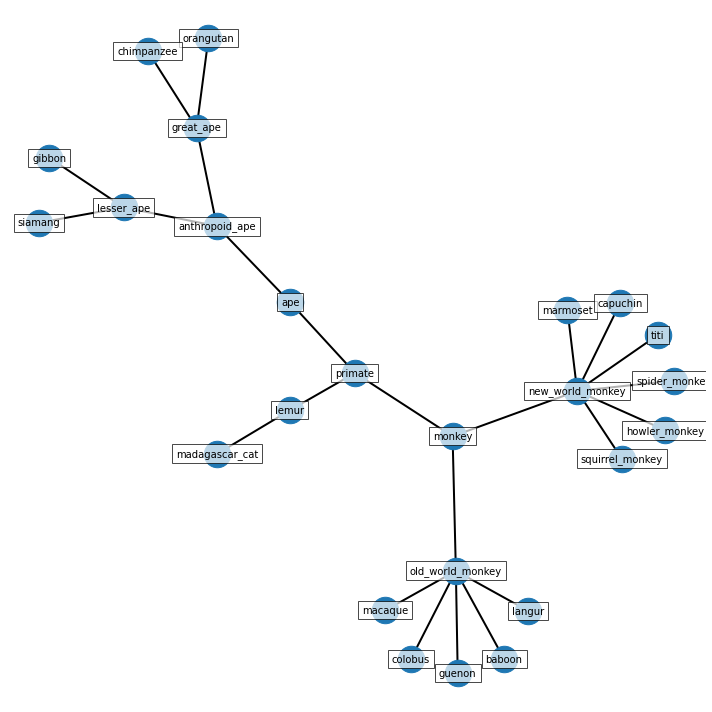

In [213]:
from networkx.drawing.nx_agraph import graphviz_layout

pos = nx.spring_layout(graph, seed=8, iterations=200, scale=3, weight="weight")
# pos = nx.nx_agraph.graphviz_layout(graph, prog="twopi", root=0)

# pos = graphviz_layout(graph)

fig, ax = plt.subplots(figsize=(10, 10))

# nx.draw(graph, pos=pos, node_size=100,  cmap=plt.cm.Blues)

elarge = [(u, v) for (u, v, d) in graph.edges(data=True)]

# nodes
nx.draw_networkx_nodes(graph, pos, node_size=700)

# edges
nx.draw_networkx_edges(graph, pos, edgelist=elarge, width=2)

# pos=nx.graphviz_layout(graph)
nx.draw_networkx_labels(graph, pos=pos, labels=labels, font_size=10,  bbox={"ec": "k", "fc": "white", "alpha": 0.7})


edge_labels = nx.get_edge_attributes(graph, "name")
nx.draw_networkx_edge_labels(graph, pos, edge_labels)



# ax = plt.gca()
# ax.margins(0.08)
# plt.axis("off")
ax.margins(0.0, 0.00)
plt.axis("off")
plt.tight_layout()
# plt.savefig("/home/kirchheim/primatenet.pdf", bbox_inches=None)
plt.show()

In [214]:
for node in graph.nodes():
    print(node())

spider_monkey.n.01
new_world_monkey.n.01
monkey.n.01
primate.n.02
madagascar_cat.n.01
lemur.n.01
orangutan.n.01
great_ape.n.01
anthropoid_ape.n.01
ape.n.01
marmoset.n.01
siamang.n.01
lesser_ape.n.01
capuchin.n.02
chimpanzee.n.01
colobus.n.01
old_world_monkey.n.01
howler_monkey.n.01
guenon.n.01
baboon.n.01
macaque.n.01
squirrel_monkey.n.01
titi.n.03
langur.n.01
gibbon.n.02


In [215]:
from itertools import combinations

# a1 = list(categories)[0]
# a2 = list(categories)[2]
# # vehicle 

# print(a1, a2)
s1 = wn.synset("deer" + str('.n.01')) 
s2 = wn.synset("bird" + str('.n.01')) 
s3 = wn.synset("frog" + str('.n.01')) 
s4 = wn.synset("car" + str('.n.01')) 

for x, y in combinations([s1, s2, s3, s4], 2):
    print(x.lexname(), y.lexname(), x.lowest_common_hypernyms(y))

for c in categories:
    print(wn.synset(str(c) + str('.n.01')).lexname())


noun.animal noun.animal [Synset('vertebrate.n.01')]
noun.animal noun.animal [Synset('vertebrate.n.01')]
noun.animal noun.artifact [Synset('whole.n.02')]
noun.animal noun.animal [Synset('vertebrate.n.01')]
noun.animal noun.artifact [Synset('whole.n.02')]
noun.animal noun.artifact [Synset('whole.n.02')]
noun.animal
noun.animal
noun.animal
noun.animal
noun.animal
noun.animal
noun.animal
noun.animal
noun.animal
noun.animal
noun.animal
noun.animal
noun.animal
noun.animal
noun.animal
noun.animal
noun.animal


In [216]:
class Node():
    def __init__(self, name):
        self.name = name
        self.children = []

    def __repr__(self):
        return f"Node({self.name})"

    def is_leaf(self):
        return len(self.children) == 0
        
    def size(self):
        if self.is_leaf():
            return 50 
            
        return sum([s.size() for s in self.children])


spider_monkey = Node(name="spider_monkey")
new_world_monkey = Node(name="new_world_monkey")
monkey = Node(name="monkey")
primate = Node(name="primate")
primate.children.append(monkey)
# --- 
monkey.children.append(new_world_monkey)
# --- 
new_world_monkey.children.append(spider_monkey)
# --- 
madagascar_cat = Node(name="madagascar_cat")
lemur = Node(name="lemur")
primate.children.append(lemur)
# --- 
lemur.children.append(madagascar_cat)
# --- 
orangutan = Node(name="orangutan")
great_ape = Node(name="great_ape")
# anthropoid_ape = Node(name="anthropoid_ape")
ape = Node(name="ape")
primate.children.append(ape)
# --- 
# ape.children.append(anthropoid_ape)
# --- 
ape.children.append(great_ape)
# --- 
great_ape.children.append(orangutan)
# --- 
marmoset = Node(name="marmoset")
new_world_monkey.children.append(marmoset)
# --- 
siamang = Node(name="siamang")
lesser_ape = Node(name="lesser_ape")
ape.children.append(lesser_ape)
# --- 
lesser_ape.children.append(siamang)
# --- 
capuchin = Node(name="capuchin")
new_world_monkey.children.append(capuchin)
# --- 
chimpanzee = Node(name="chimpanzee")
great_ape.children.append(chimpanzee)
# --- 
colobus = Node(name="colobus")
old_world_monkey = Node(name="old_world_monkey")
monkey.children.append(old_world_monkey)
# --- 
old_world_monkey.children.append(colobus)
# --- 
howler_monkey = Node(name="howler_monkey")
new_world_monkey.children.append(howler_monkey)
# --- 
guenon = Node(name="guenon")
old_world_monkey.children.append(guenon)
# --- 
baboon = Node(name="baboon")
old_world_monkey.children.append(baboon)
# --- 
macaque = Node(name="macaque")
old_world_monkey.children.append(macaque)
# --- 
squirrel_monkey = Node(name="squirrel_monkey")
new_world_monkey.children.append(squirrel_monkey)
# --- 
titi = Node(name="titi")
new_world_monkey.children.append(titi)
# --- 
langur = Node(name="langur")
old_world_monkey.children.append(langur)
# --- 
gibbon = Node(name="gibbon")
lesser_ape.children.append(gibbon)
# --- 

In [220]:
def wordnet_graph_new(words):
    graph = nx.Graph()
    labels = {}
    edge_labels = {}
    
    def recurse(s, level=1):
        """ Recursively move up semantic hierarchy and add nodes / edges """  

        graph.add_node(s.name, level=level, size=s.size(), leaf=s.is_leaf())                      # add node
        print(s)

        labels[s.name] = s.name.replace("_", "\n").title()
        
        for child in s.children:
            recurse(child, level=level + 1) 
            graph.add_edge(child.name, s.name, 
                           weight = level, name="is-a",)
            # graph.edge_labels=""

    recurse(primate)
    
    # return the graph and labels    
    return graph , labels, edge_labels

In [221]:
graph, labels, edge_labels = wordnet_graph_new(categories)

Node(primate)
Node(monkey)
Node(new_world_monkey)
Node(spider_monkey)
Node(marmoset)
Node(capuchin)
Node(howler_monkey)
Node(squirrel_monkey)
Node(titi)
Node(old_world_monkey)
Node(colobus)
Node(guenon)
Node(baboon)
Node(macaque)
Node(langur)
Node(lemur)
Node(madagascar_cat)
Node(ape)
Node(great_ape)
Node(orangutan)
Node(chimpanzee)
Node(lesser_ape)
Node(siamang)
Node(gibbon)


[8000 5500 3000  500  500  500  500  500  500 2500  500  500  500  500
  500  500  500 2000 1000  500  500 1000  500  500]
['slategray', 'slategray', 'slategray', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'slategray', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'slategray', 'cornflowerblue', 'slategray', 'slategray', 'cornflowerblue', 'cornflowerblue', 'slategray', 'cornflowerblue', 'cornflowerblue']


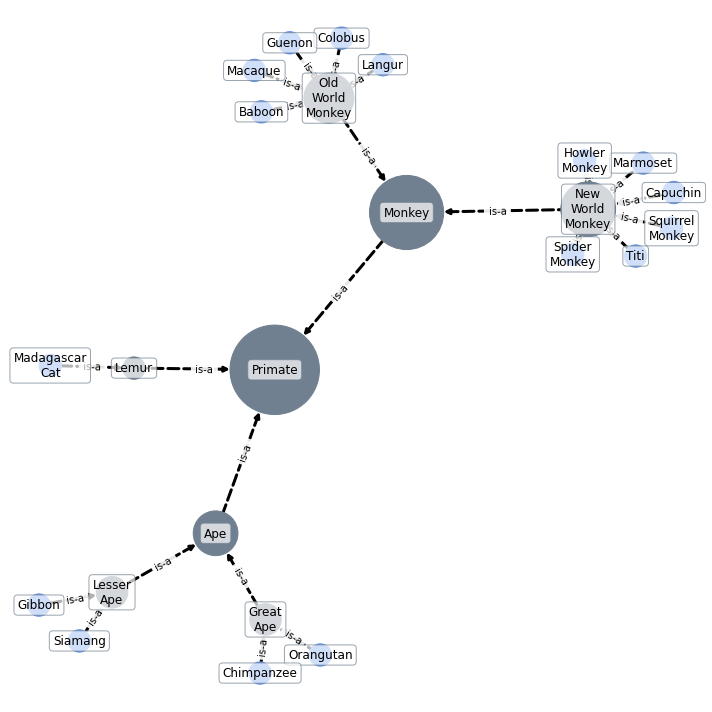

In [226]:
from networkx.drawing.nx_agraph import graphviz_layout
import numpy as np 

pos = nx.spring_layout(graph, seed=0, iterations=300, scale=0.1)
# pos = nx.nx_agraph.graphviz_layout(graph, prog="twopi", root=0)

# pos = graphviz_layout(graph)

fig, ax = plt.subplots(figsize=(10, 10))

# nx.draw(graph, pos=pos, node_size=100,  cmap=plt.cm.Blues)

elarge = [(u, v) for (u, v, d) in graph.edges(data=True)]

# nodes
node_size = np.array(list(nx.get_node_attributes(graph, "size").values())) * 10
print(node_size)


node_color = []
for name, is_leaf in nx.get_node_attributes(graph, "leaf").items():
    if is_leaf is True:
        node_color.append("cornflowerblue")
    else:
        node_color.append("slategray")

print(node_color)
             
nx.draw_networkx_nodes(graph, pos, node_size=node_size, node_color=node_color) # , node_color="b"

# edges
nx.draw_networkx_edges(graph, pos, 
                       edgelist=elarge, 
                       width=3, 
                       style="dashed", 
                    # edge_color="b", 
                       arrows=True,
                        arrowstyle="<|-", 
                        arrowsize=10,
                        node_size=node_size, 
                    )


edge_labels = nx.get_edge_attributes(graph, "name")
nx.draw_networkx_edge_labels(graph, 
                             pos, 
                             edge_labels,  
                             font_size=10, 
                             font_family="sans-serif", 
                             font_color="black", 
                             bbox={"alpha": 0.9, "fc": "white", "ec": "white"}
                             )

# pos=nx.graphviz_layout(graph)
nx.draw_networkx_labels(graph, pos=pos, 
                        labels=labels, 
                        font_size=12,  
                        bbox={"ec": "slategray", "fc": "white", "alpha": 0.7,
                             "boxstyle": 'round'}, 
                        font_family="sans-serif")




# nx.draw(G, pos, node_color=color, with_labels=False)
# node_color=color

# ax = plt.gca()
# ax.margins(0.08)
# plt.axis("off")
ax.margins(0.0, 0.00)
plt.axis("off")
plt.tight_layout()
plt.savefig("/home/ki/primatenet-new.pdf", bbox_inches=None)
plt.show()